In [76]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import time
import seaborn as sns

In [2]:
data = np.loadtxt('data.csv')

np.random.seed(100)
np.random.shuffle(data)
features = []
digits = []
for row in data:
    features.append(row[1:])
    digits.append(str(row[0]))

#dont need split since it is unsupervised    

In [3]:
inertia = []
clusters = list(range(2,21))

np.random.seed(100)
for i in clusters:
    kmeans = KMeans(n_clusters=i, init='random').fit(features)
    inertia.append(kmeans.inertia_)

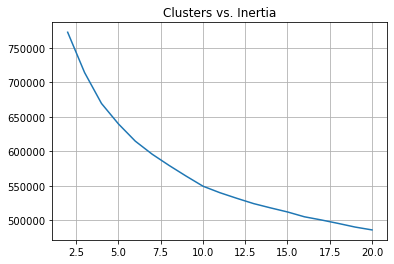

In [36]:
plt.plot(clusters, inertia)
plt.grid()
plt.title("Clusters vs. Inertia")
plt.savefig('clusters_intertia.pdf')

b) Using the elbow test, we know the best number of clusters will be 10. This matches expectations because we know the dataset has 10 unique outcomes as the integers from 0 to 9.

In [5]:
inertia_two = []
clusters = list(range(2,21))

np.random.seed(100)
for i in clusters:
    kmeans = KMeans(n_clusters=i, init='random', n_init=1, max_iter=1).fit(features)
    inertia_two.append(kmeans.inertia_)

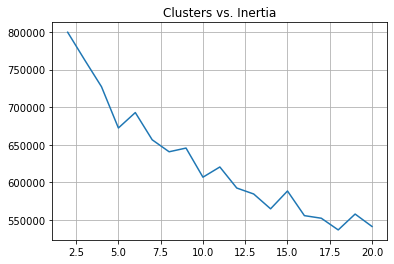

In [37]:
plt.plot(clusters, inertia_two)
plt.grid()
plt.title("Clusters vs. Inertia")
plt.savefig('clusters_intertia_two.pdf')

The difference is rather drastic for these two graphs. The second graph is not smooth and also has sections where the inertia is increasing. Also, the inertia is higher for the second graph.

In [32]:
n_iters = []

np.random.seed(100)
for i in clusters:
    kmeans = KMeans(n_clusters=i, init='random').fit(features)
    n_iters.append(kmeans.n_iter_)

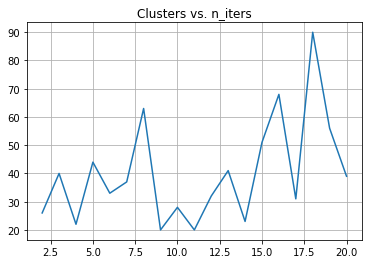

In [38]:
plt.plot(clusters, n_iters)
plt.grid()
plt.title("Clusters vs. n_iters")
plt.savefig('clusters_n_iters.pdf')

Yes, we expect more clusters to take longer to converge once we go past the best number of clusters. This is because it becomes more densely populated for the centroids as they move into local minimums and maximums rather than global local minimums and maximums. In this instance, we can see once it goes past 10 centroids it takes many more iterations for convergence.

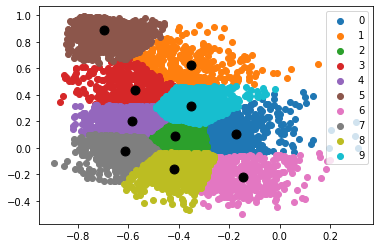

In [39]:
X = list(np.mean(data, axis=1))
maxnumx = max(X)

Y = []
for i in range(len(features)):
    x = features[i][0:128]
    y = features[i][128:]
    Y.append(pearsonr(x,y)[0])
maxnumy = max(Y)

MeanCorrelation = np.column_stack((X, Y))

df = MeanCorrelation

np.random.seed(100)
kmeans = KMeans(n_clusters=10, init='random')
label = kmeans.fit_predict(df)

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.savefig('clustering.pdf')

This data is not clearly seperated. We do not see instances of circles or ellipses so the data cannot be easily seperated using this methodology. This worked for our binary classification between 1 and 5 since they are not similar, even when written hastily. When we are classifying all the digits we run into the problem where some are similar to others, especially if they are written quickly. Consider a 7 and a 1 that are written fas, the computer would most likely not be able to determine the difference between the two. Another example could be 6 and 5; this added complication means we cannot realistically use the 2-D data to seperate it and this outcome is expected.

In [10]:
trainFeatures, testFeatures, trainDigits, testDigits = train_test_split(features, digits, test_size=0.2, random_state=100)

In [11]:
transfusionData = pd.read_csv("transfusion.data")

In [12]:
transfusionData

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [13]:
X = transfusionData.drop("whether he/she donated blood in March 2007", axis=1)
y = transfusionData["whether he/she donated blood in March 2007"]

In [14]:
X_transfusion_train, X_transfusion_test, y_transfusion_train, y_transfusion_test = train_test_split(X, y, test_size=0.2, random_state=100)

[2, 5, 10, 4, 10, 20, 10, 25, 50]
[0.34579096045197744, 0.3441525423728814, 0.33576271186440687, 0.3341242937853107, 0.3933333333333333, 0.2324293785310736, 0.2424293785310735, 0.29576271186440684, 0.2375706214689266]


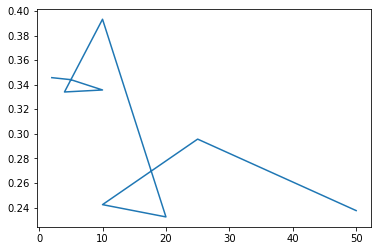

In [64]:
values = [1, 2, 5]
nodes = [2, 5, 10]

time_blood = []
error = []
logC = []
for i in values:
    for j in nodes:
        start = time.time()
        tup = tuple(j for l in range(i))
        NN_model = model = MLPClassifier(hidden_layer_sizes = tup, activation="relu", epsilon=0.001, max_iter=10000,
                                         solver="adam")
        scores = cross_val_score(NN_model, X_transfusion_train, y_transfusion_train, cv=10)
        error.append(1 - np.mean(scores))
        logC.append(i*j)
        end = time.time()
        time_blood.append((end-start))
print(logC)
print(error)
plt.plot(logC, error)
plt.show()
        

In [65]:
for i in values:
    for j in nodes:
        print(tuple(j for l in range(i)))


(2,)
(5,)
(10,)
(2, 2)
(5, 5)
(10, 10)
(2, 2, 2, 2, 2)
(5, 5, 5, 5, 5)
(10, 10, 10, 10, 10)


In [66]:
print("Min: ", pd.Series(error).idxmin())

Min:  5


In [67]:
time_blood[7]

2.170741319656372

In [22]:
numTrain = int(len(df)*.8)
trainFeatures = df[:numTrain]
testFeatures = df[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

[2, 5, 10, 50, 100, 4, 10, 20, 100, 200, 10, 25, 50, 250, 500, 20, 50, 100, 500, 1000]
[0.6363125308395404, 0.5792191428370027, 0.5591558189807092, 0.5507539533353698, 0.5514397659719448, 0.7078062219507038, 0.5735625837073239, 0.557274019596325, 0.5500704903780634, 0.5533265584247751, 0.7554950186799502, 0.6159205455955262, 0.5534960290420358, 0.5488668671726309, 0.5531523884489767, 0.836247914659649, 0.6904503160318616, 0.5991159331751217, 0.5531518010291595, 0.5581237223618977]


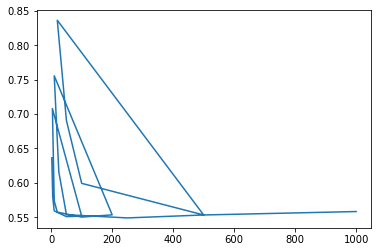

In [57]:
digit_values = [1, 2, 5, 10]
digit_nodes = [2, 5, 10, 50, 100]
errorDigits = []
logCDigits = []
time_digits = []

for i in digit_values:
    for j in digit_nodes:
        start = time.time()
        tup = tuple(j for l in range(i))
        NN_digits_model = MLPClassifier(hidden_layer_sizes = tup, activation="relu", epsilon=0.001, max_iter=10000,
                                       solver="adam")
        scores = cross_val_score(NN_digits_model, trainFeatures, trainDigits, cv=10)
        errorDigits.append(1 - np.mean(scores))
        logCDigits.append(i*j)
        end = time.time()
        time_digits.append((end-start))
        
print(logCDigits)
print(errorDigits)
plt.plot(logCDigits, errorDigits)
plt.show()

In [58]:
print("Min: ", pd.Series(errorDigits).idxmin())

Min:  13


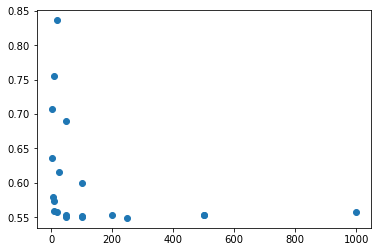

In [59]:
plt.scatter(logCDigits, errorDigits)

In [60]:
time_digits[9]

35.465707302093506

In [49]:
start = time.time()
NN_digits_model = MLPClassifier(hidden_layer_sizes = (100,100), activation="relu", epsilon=0.01, max_iter=10000,
                               solver="adam")
scores = cross_val_score(NN_digits_model, trainFeatures, trainDigits, cv=10)
error = (1 - np.mean(scores))
end = time.time()
print(error)
print((end-start))
print("Error Difference for epsilon increase", pd.Series(errorDigits).min() - error)

0.5493823280622195
70.20294713973999
Error Difference for epsilon increase -0.0015437392795883964


In [132]:
start = time.time()
NN_digits_model = MLPClassifier(hidden_layer_sizes = (100,100), activation="relu", epsilon=0.0001, max_iter=10000,
                               solver="adam")
scores = cross_val_score(NN_digits_model, trainFeatures, trainDigits, cv=10)
error = (1 - np.mean(scores))
end = time.time()
print(error)
print((end-start))
print("Error Difference for epsilon decrease", pd.Series(errorDigits).min() - error)

0.5461236166263305
30.876388549804688
Error Difference for epsilon decrease 0.002743250546300424


In [68]:
start = time.time()
NN_model = model = MLPClassifier(hidden_layer_sizes = (5,5,5,5,5), activation="relu", epsilon=0.01, max_iter=10000,
                                 solver="adam")
scores = cross_val_score(NN_model, X_transfusion_train, y_transfusion_train, cv=10)
error = (1 - np.mean(scores))
end = time.time()
print(error)
print((end-start))
print("Error Difference for epsilon increase", pd.Series(error).min() - error)

0.2374293785310735
2.2953238487243652
Error Difference for epsilon increase 0.0


In [69]:
start = time.time()
NN_model = model = MLPClassifier(hidden_layer_sizes = (5,5,5,5,5), activation="relu", epsilon=0.0001, max_iter=10000,
                                 solver="adam")
scores = cross_val_score(NN_model, X_transfusion_train, y_transfusion_train, cv=10)
error = (1 - np.mean(scores))
end = time.time()
print(error)
print((end-start))
print("Error Difference for epsilon decrease", pd.Series(error).min() - error)

0.2324293785310736
1.9026381969451904
Error Difference for epsilon decrease 0.0


In [94]:
def unique(list1):
 
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    for x in unique_list:
        print(x)
        
digitunique = unique(trainDigits)


9.0
3.0
6.0
4.0
1.0
2.0
7.0
5.0
8.0
0.0


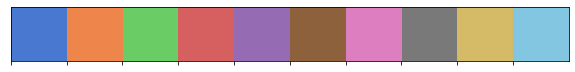

In [120]:
sns.palplot(sns.color_palette("muted"))
rgb_values = sns.color_palette("Set2", 100)

# Map continents to the colors
color_map = dict(zip(trainDigits, rgb_values))



In [128]:
colors = []
for index in range(len(trainFeatures)):
    if(trainDigits[index]=="1.0"):
        colors.append((0.9882352941176471, 0.5529411764705883, 0.3843137254901961))
    if(trainDigits[index]=="2.0"):
        colors.append((0.5529411764705883, 0.6274509803921569, 0.796078431372549))
    if(trainDigits[index]=="3.0"):
        colors.append((1.0, 0.8509803921568627, 0.1843137254901961))
    if(trainDigits[index]=="4.0"):
        colors.append((0.9058823529411765, 0.5411764705882353, 0.7647058823529411))
    if(trainDigits[index]=="5.0"):
        colors.append((0.8980392156862745, 0.7686274509803922, 0.5803921568627451))
    if(trainDigits[index]=="6.0"):
        colors.append((0.7019607843137254, 0.7019607843137254, 0.7019607843137254))
    if(trainDigits[index]=="7.0"):
        colors.append((0.8980392156862745, 0.7686274509803922, 0.5803921568627451))
    if(trainDigits[index]=="8.0"):
        colors.append((0.9882352941176471, 0.5529411764705883, 0.3843137254901961))
    if(trainDigits[index]=="9.0"):
        colors.append((0.6509803921568628, 0.8470588235294118, 0.32941176470588235))
    if(trainDigits[index]=="0.0"):
        colors.append((0.6509803921568628, 0.8470588235294118, 0.32941176470588235))

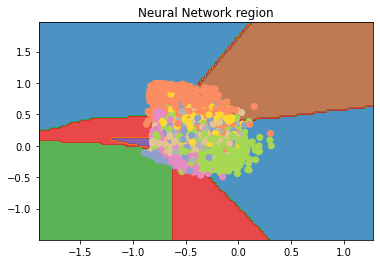

In [139]:
X = trainFeatures

def plotNN(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    z = NN_digits_model.fit(trainFeatures, trainDigits).predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.savefig('NNregion.pdf')
    plt.show()
    pass

plotNN('Neural Network region')
